
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head(5)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [3]:
# number of callbacks for balck-sounding names
sum(data[data.race=='b'].call)/len(data[data.race=='b'])

0.064476386036960986

In [4]:
sum(data[data.race=='w'].call)/len(data[data.race=='w'])

0.096509240246406572

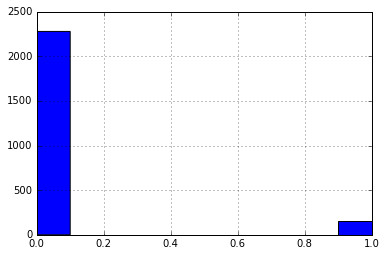

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure()
data[data.race=='b'].call.hist()

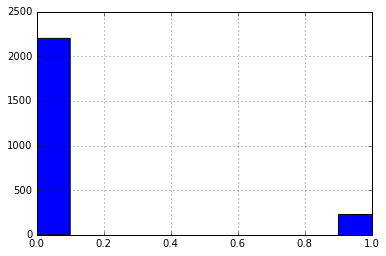

In [7]:
data[data.race=='w'].call.hist()

The distribution pattern is not normal so CLT is not applicable. However, Chi-square test should be appropriate for this problem.

We define two hypotesises:

* H0: The two plots do not have any difference.
* H1: The two plots have difference.

If the difference is proved to be caused by chance, we could say there is no racial discrimination.

In [9]:
obs = [sum(data[data.race=='b'].call),len(data[data.race=='b']) - sum(data[data.race=='b'].call)]
exp = [sum(data[data.race=='w'].call),len(data[data.race=='w']) - sum(data[data.race=='w'].call)]

In [15]:
chi, p_val = stats.chisquare(f_obs = obs,f_exp = exp)

In [17]:
obs, exp, chi, p_val

([157.0, 2278.0], [235.0, 2200.0], 28.654816247582204, 8.6498591362764807e-08)

It is hard to accecpt H0 with this low probablity. Thus we accept H1: racial discrimination exists. 